## Technical Stock Analysis (RSI) in Python

In [3]:
import datetime as dt
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from bs4 import BeautifulSoup as bs
import requests

In [4]:
ticker='AAPL'
start = dt.datetime(2021, 1, 1) # start date is 1st Jan 2021
end = dt.datetime(2021, 12, 31) # end date is 31st Dec 2021

df = pdr.DataReader(ticker, 'yahoo', start, end) # get data from Yahoo Finance for the given ticker
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [9]:
delta = df['Adj Close'].diff(1) # Get difference between Adj Close and Adj Close of previous day
type(delta)
delta.head()

pandas.core.series.Series

Date
2020-12-31         NaN
2021-01-04   -3.255737
2021-01-05    1.588135
2021-01-06   -4.377388
2021-01-07    4.288063
Name: Adj Close, dtype: float64

In [10]:
positive = delta.copy()
negative = delta.copy()

positive[positive<0] = 0
negative[negative>0] = 0

In [11]:
type(positive)
positive.dropna(inplace=True)
positive

pandas.core.series.Series

Date
2021-01-04    0.000000
2021-01-05    1.588135
2021-01-06    0.000000
2021-01-07    4.288063
2021-01-08    1.121658
                ...   
2021-12-27    4.044846
2021-12-28    0.000000
2021-12-29    0.089890
2021-12-30    0.000000
2021-12-31    0.000000
Name: Adj Close, Length: 252, dtype: float64

In [12]:
type(negative)
negative.dropna(inplace=True)
negative

pandas.core.series.Series

Date
2021-01-04   -3.255737
2021-01-05    0.000000
2021-01-06   -4.377388
2021-01-07    0.000000
2021-01-08    0.000000
                ...   
2021-12-27    0.000000
2021-12-28   -1.038681
2021-12-29    0.000000
2021-12-30   -1.178497
2021-12-31   -0.629196
Name: Adj Close, Length: 252, dtype: float64

In [15]:
days = 45
# RSI - Relative Strength Index
avg_gains = positive.rolling(window=days).mean() # Get average gains over rolling window of 45 days
avg_losses = negative.abs().rolling(window=days).mean() # Get average losses over rolling window of 45 days

In [18]:
avg_gains.fillna(0, inplace=True)
avg_gains

Date
2021-01-04    0.000000
2021-01-05    0.000000
2021-01-06    0.000000
2021-01-07    0.000000
2021-01-08    0.000000
                ...   
2021-12-27    1.421965
2021-12-28    1.421965
2021-12-29    1.423962
2021-12-30    1.408892
2021-12-31    1.408892
Name: Adj Close, Length: 252, dtype: float64

In [19]:
avg_losses.fillna(0, inplace=True)
avg_losses

Date
2021-01-04    0.000000
2021-01-05    0.000000
2021-01-06    0.000000
2021-01-07    0.000000
2021-01-08    0.000000
                ...   
2021-12-27    0.732447
2021-12-28    0.738021
2021-12-29    0.736913
2021-12-30    0.763102
2021-12-31    0.766668
Name: Adj Close, Length: 252, dtype: float64

In [20]:
Relative_Strength_Index = 100 - (100 / (1 + avg_gains / avg_losses))

In [21]:
combined = pd.DataFrame()
combined['Adj Close'] = df['Adj Close']
combined['RSI'] = Relative_Strength_Index

In [24]:
combined.RSI = combined.RSI.fillna(0)
combined

,Adj Close,RSI
Date,,
2020-12-31,131.709213,0.00
2021-01-04,128.453476,0.00
2021-01-05,130.041611,0.00
2021-01-06,125.664223,0.00
2021-01-07,129.952286,0.00
...,...,...
2021-12-27,180.100540,66.00
2021-12-28,179.061859,65.83
2021-12-29,179.151749,65.90


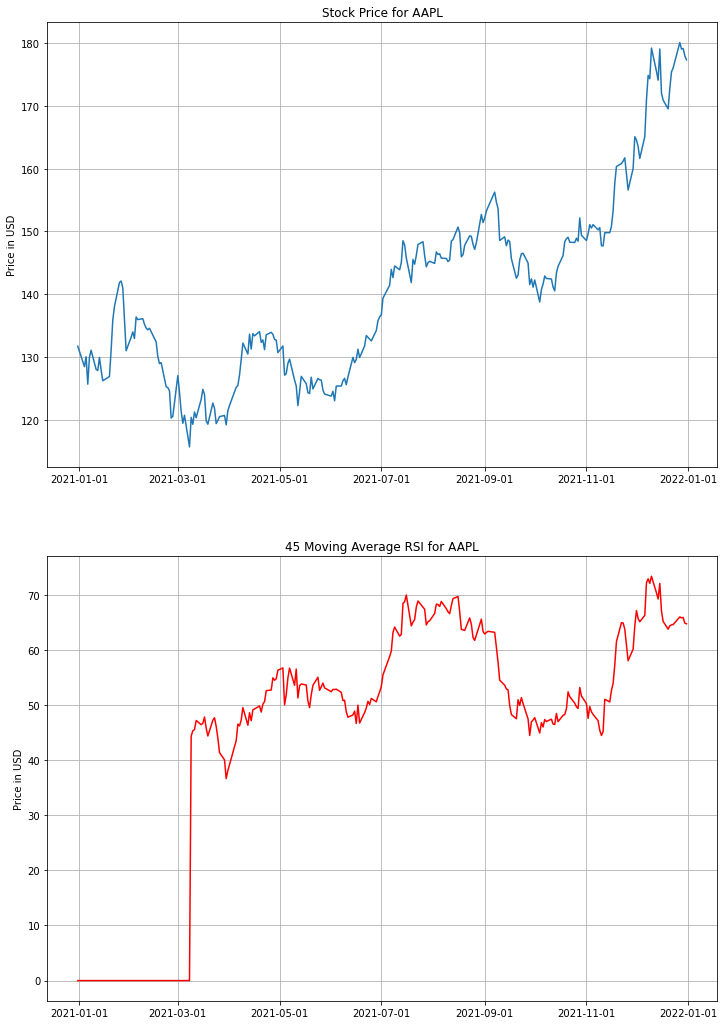

In [37]:
plt.figure(figsize=(12,18))

ax1=plt.subplot(2,1,1)
ax1.plot(combined.index, combined['Adj Close'])
ax1.title.set_text(f'Stock Price for {ticker}')
ax1.set_ylabel('Price in USD')
ax1.grid(True)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
ax1.set_axisbelow(True)
ax1.tick_params(axis='x')


ax2 = plt.subplot(2,1,2,sharex=ax1)
ax2.plot(combined.index, combined['RSI'],color='red')
ax2.title.set_text(f'{days} Moving Average RSI for {ticker}')
ax2.set_ylabel('Price in USD')
ax2.grid(True)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
ax2.set_axisbelow(True)
ax2.tick_params(axis='x')

plt.show();